# Titanic: Machine Learning from Disaster

## Predict survival on the Titanic


**Defining the problem statement**
* Collecting the data
* Exploratory data analysis
* Feature engineering
* Feature selection
* Modelling 
* Training

## 1.Defining the problem statement

Complete the analysis of what sort of people were likely to survive.
In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy

## 2. Collecting the data 

training and testing data set are given by Kaggle. You can download from [Kaggle](https://www.kaggle.com/c/titanic/data).

### load train, test dataset using Pandas

In [1]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### 3. Exploratory data analysis

Printing first 5 rows of the train dataset

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Data Dictionary**
* Survived: 0 = No, 1 = Yes
* pclass  : Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
* sibsp   : # of siblings/ spouses aboard the Titanic
* parch   : # of parents/ children aboard the Titanic 
* ticket  : Ticket number
* cabin   : Cabin number
* embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

**Total rows and columns**

In [3]:
train.shape

(891, 12)

We can see there are 891 rows and 12 columns in our training dataset

In [4]:
test.shape

(418, 11)

There are 418 rows and 11 columns in our testing dataset

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


We can see that Age values are missing for many rows.


Out of 891 rows, the Age value is present only in 714 rows.


Similarly, Cabin values are missing in many rows. Only 204 out of 891 have Cbin values.

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 27.8+ KB


We can see that Age, Cabin, Fare have missing values

In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are 177 rows with missing Age, 687 rows with missing Cabin and 2 rows with missing Embarked information

In [8]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

There are 86 rows with missing Age, 1 row with missing Fare and 327 rows with missing Cabin

### import python lib for visualization

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

### Bar Chart for Categorical Features


* Pclass
* Sex
* SibSp(# of siblings and spouse)
* Emabrked

In [10]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

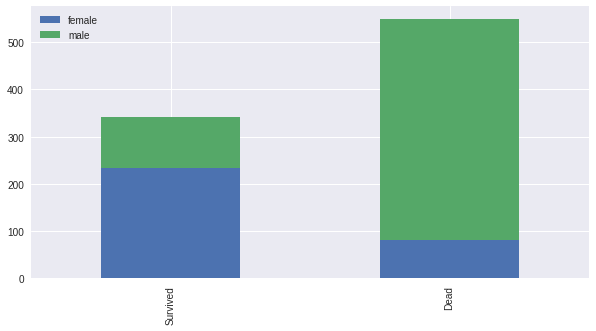

In [11]:
bar_chart('Sex')

The Chart confirms **Women** more likely survived than **Men**

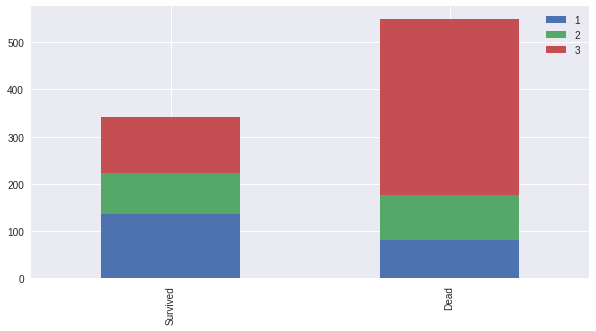

In [12]:
bar_chart('Pclass')

The chart confirms **1st class** more likely survived than other classes

The chart confirms **3rd class** more likely dead than other classes

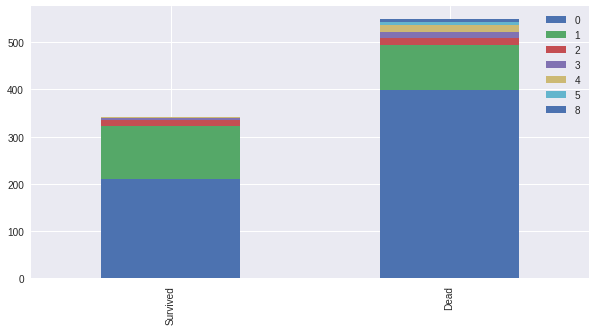

In [13]:
bar_chart('SibSp')

The chart confirms **a person aboarded with more than 2 siblings or spouse** more likely survived


The chart confirms **a person aboarded without siblings or spouse** more likely dead

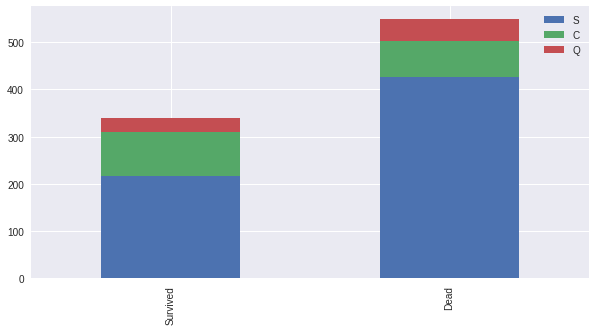

In [14]:
bar_chart('Embarked')

The chart confirms **a person aboarded from C** slightly more likely survived

The chart confirms **a person aboarded from Q** slightly more likely dead

## References

This notebook is created by learning from the following notebooks:

* [Kaggle Solution for titanic problem](https://www.kaggle.com/startupsci/titanic-data-science-solutions)
* [Youtube videos](https://www.youtube.com/watch?v=3eTSVGY_fIE&t=3s) 

## 4.Feature engineering

Feature enginnering is the process of using domain knowledge of the data
to create features(**feature vectors**) that make machine learning algorithms work.

feature vector is an n-dimensional vector of numerical features that represent some objects.

Many algorithms in machine learning require a numerical representation of objects, since such representations facilitate processing and statistical analysis.

In [15]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## 4.1 Name

We are going to add column **Title** by extracting the information from name and maps the numerical value to that info.

By doing this we can remove name column and have numerical values instead of text

In [16]:
train_test_data = [train, test] #combining train and test dataset

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [17]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Mme           1
Countess      1
Ms            1
Sir           1
Jonkheer      1
Don           1
Lady          1
Capt          1
Name: Title, dtype: int64

In [18]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Ms          1
Dona        1
Name: Title, dtype: int64

We are categorising info into 4 major groups from the above result.

###  Title map

* Mr: 0
* Miss: 1
* Mrs: 2
* Others: 3

Map the corresponding number to the corresponded group in the combined dataset

In [19]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, "Dr": 3, "Rev": 4, "Col": 3, "Major": 3, "Mile": 3,
                 "Countess":3, "Ms": 3, "Dona": 3, "Lady": 3, "Jonkheer": 3, "Mme": 3, "Capt": 3, "Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [20]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


In [21]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


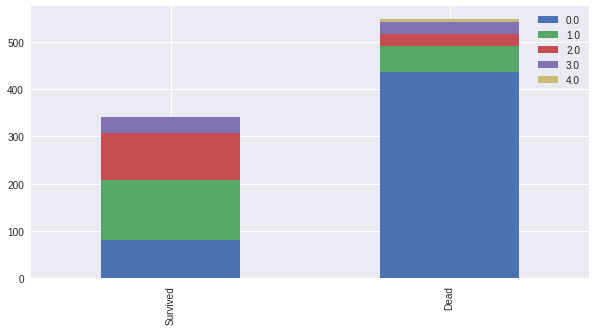

In [22]:
bar_chart('Title')

Clearly tells ladies survived more likely than men

In [23]:
#delete unnecessary feature from dataset
test.drop('Name', axis=1, inplace=True)
train.drop('Name', axis=1, inplace=True)

In [24]:
train.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0.0


In [25]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


## 4.2 Sex

male: 0, female: 1

Map the numerical values to corresponding sex

In [26]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

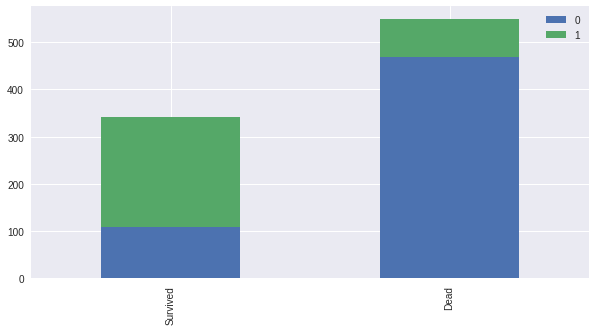

In [27]:
bar_chart('Sex')

## 4.3 Age

### 4.3.1 some age is missing

let's use Title's median age for missing Age

In [28]:
train.head(100)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.00,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,1,38.00,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,1,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,1,35.00,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,0,35.00,0,0,373450,8.0500,NaN,S,0.0
5,6,0,3,0,NaN,0,0,330877,8.4583,NaN,Q,0.0
6,7,0,1,0,54.00,0,0,17463,51.8625,E46,S,0.0
7,8,0,3,0,2.00,3,1,349909,21.0750,NaN,S,3.0
8,9,1,3,1,27.00,0,2,347742,11.1333,NaN,S,2.0
9,10,1,2,1,14.00,1,0,237736,30.0708,NaN,C,2.0


In [29]:
#fill missing age with medianage for each title (Mr, Mrs, Miss, Others)
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [30]:
train.head(100)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.00,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,1,38.00,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,1,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,1,35.00,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,0,35.00,0,0,373450,8.0500,NaN,S,0.0
5,6,0,3,0,30.00,0,0,330877,8.4583,NaN,Q,0.0
6,7,0,1,0,54.00,0,0,17463,51.8625,E46,S,0.0
7,8,0,3,0,2.00,3,1,349909,21.0750,NaN,S,3.0
8,9,1,3,1,27.00,0,2,347742,11.1333,NaN,S,2.0
9,10,1,2,1,14.00,1,0,237736,30.0708,NaN,C,2.0


## 4.3.2 Bining

Bining/Converting Numerical Age to Categorical Variable

feature vector map:
* child:0
* young:1
* adult:2
* mid-age:3
* senior:4


In [31]:
for dataset in train_test_data:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[dataset['Age'] > 62, 'Age'] = 4

In [32]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0.0


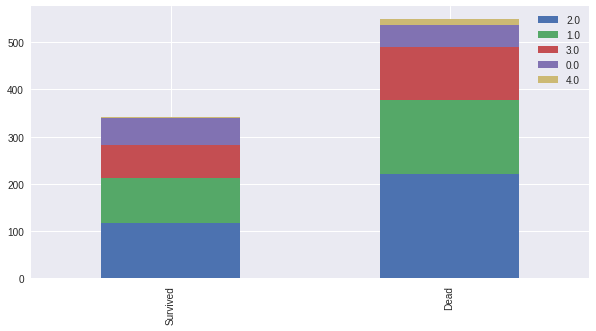

In [33]:
bar_chart('Age')

## 4.4 Embarked

### 4.4.1 filing missing values

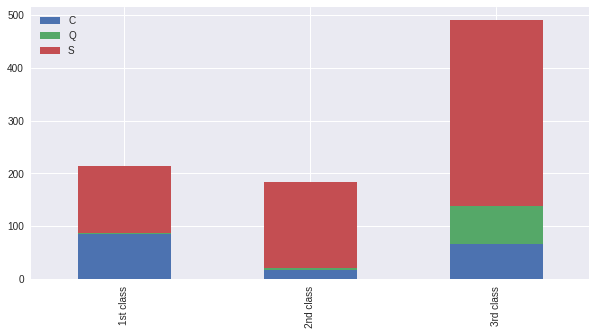

In [34]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class','3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

more than 50% of 1st class are from S embark

more than 50% of 2nd class are from S embark

more than 50% of 3rd class are from S embark

###  fill out missing embark with S embark

In [35]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [36]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0.0


In [37]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset["Embarked"] = dataset['Embarked'].map(embarked_mapping)

In [38]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0.0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1.0
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2.0
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0.0


## 4.5 Fare 

In [39]:
# fill missingfare with median fare for each Pclass
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [40]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0.0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1.0
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2.0
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0.0


In [41]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [42]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0.0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1.0
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2.0
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0.0


##  4.6 Cabin

In [43]:
train.Cabin.value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
C22 C26        3
D              3
F33            3
E101           3
F2             3
C126           2
B35            2
B22            2
D26            2
D33            2
C124           2
C52            2
C123           2
C93            2
D17            2
D35            2
B18            2
B5             2
B58 B60        2
B28            2
E8             2
B51 B53 B55    2
B77            2
D20            2
C78            2
F4             2
E24            2
              ..
E17            1
B101           1
C85            1
C46            1
D15            1
D6             1
C47            1
D19            1
E68            1
B39            1
A24            1
E50            1
D9             1
D10 D12        1
C106           1
A19            1
B79            1
E49            1
B69            1
C62 C64        1
F38            1
D46            1
E36            1
A36            1
C86            1
A26            1
C148           1
C7            

In [44]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

In [45]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping) 

In [46]:
#fill missing cabin values with median for each Pclass
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'), inplace=True)
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('median'), inplace=True)

##  4.7 Family size

In [47]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

In [48]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping) 

In [49]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0.0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2.0,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1.0,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2.0,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0.0,0.0


Remove the unnecessary features from the dataset to make it clean

In [50]:
features_drop = ['Ticket','SibSp','Parch','Title']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [51]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 7), (891,))

In [52]:
train_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize
0,3,0,1.0,0.0,2.0,0,0.4
1,1,1,3.0,2.0,0.8,1,0.4
2,3,1,1.0,0.0,2.0,0,0.0
3,1,1,2.0,2.0,0.8,0,0.4
4,3,0,2.0,0.0,2.0,0,0.0


## References

This notebook is created by learning from the following:

* [Kaggle Solution for titanic problem](https://www.kaggle.com/startupsci/titanic-data-science-solutions)
* [Youtube videos](https://www.youtube.com/watch?v=3eTSVGY_fIE&t=3s) 

## 5. Modelling

In [53]:
# Importing Classifier Modules
from sklearn.svm import SVC

import numpy as np

In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
Fare          891 non-null float64
Cabin         891 non-null float64
Embarked      891 non-null int64
FamilySize    891 non-null float64
dtypes: float64(4), int64(4)
memory usage: 55.7 KB


In [55]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize
0,0,3,0,1.0,0.0,2.0,0,0.4
1,1,1,1,3.0,2.0,0.8,1,0.4
2,1,3,1,1.0,0.0,2.0,0,0.0
3,1,1,1,2.0,2.0,0.8,0,0.4
4,0,3,0,2.0,0.0,2.0,0,0.0


## 5.1 Cross Validation (K-fold)

In [56]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

## 5.1.2 SVM

In [57]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[ 0.78888889  0.79775281  0.79775281  0.78651685  0.85393258  0.80898876
  0.78651685  0.84269663  0.82022472  0.82022472]


In [58]:
round(np.mean(score)*100,2)

81.030000000000001

## 6. Testing

In [59]:
clf = SVC()
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

In [60]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [61]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## References

This notebook is created by learning from following:

* [Kaggle Solution for titanic problem](https://www.kaggle.com/startupsci/titanic-data-science-solutions)
* [Youtube videos](https://www.youtube.com/watch?v=3eTSVGY_fIE&t=3s)  